# Handling imbalanced dataset in machine learning

Video number 21

Video = https://youtu.be/JnlM4yLFNuo?si=HqbWBWhqHE_tI9DE

Fraud detection is a common problem that people try to solve in the field of ML, But when ur training ur model with a training set for fraud transaction, u will often find that u may have 10k good transactions and only 1 or 2 will be fraud.

This creates an Imbalance in ur dataset.

And even if u write a simple Python code which only returns False all the time
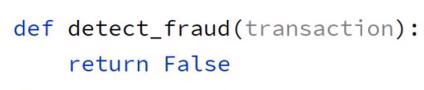
Even with this stupid function u can get 99% accuracy because majority of the transaction are not fraud, but on the other hand what u care about is the fraud transaction, so although accuracy might be 99% the func is still performing horrible cuz its not teleling u whats fraud

So basically if u have an Imbalance dataset then ur overall accuracy dont matter as ur model might only be trained on 1 class and not the other.

So, this kind of imbalance creates alot of issues in the field of ML, but there are ways to tackle these, so thats what we will be covering, so will start with some Theory first then will implement it

## 1. UNDER-SAMPLING THE MAJORITY CLASS

The first technique to handle imbalance in ur dataset is **Under sampling majority class**.

Lets say u have 99k samples of green class and 1k samples belong to red class
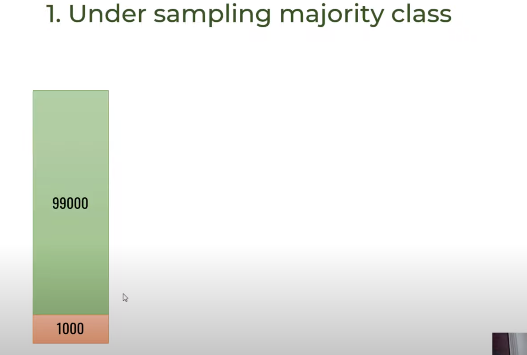

Lets say this is fraud detection where 99k are good transactions and only 1k are fraud.

So to takle this imbalance, what we can do is, take randomly picked 1k samples from your 99k samples and discard remaining samples, and then concat or combine that with the 1k samples from red class and then train your ML model.

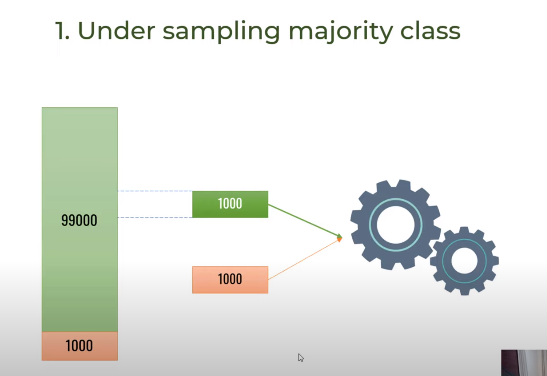

But obviously this is not the best approach because u are throwing away so much datas, so lets move to the next Option...

## 2. OVER-SAMPLE THE MINORITY CLASS BY DUPLICATION

The second option is to **Over Sample** the Minority class.

Now, how do u oversanple it? well one obvious technique is to Duplicate this 1k red samples 99 times and u will get 99k samples for red class as well

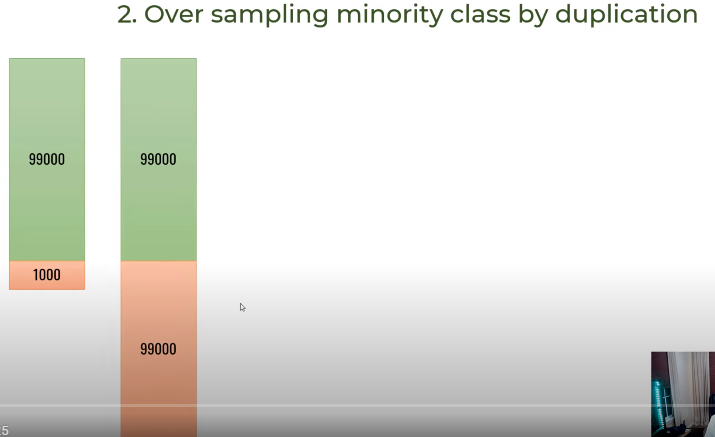

And then we simply combine them and Train the ML model

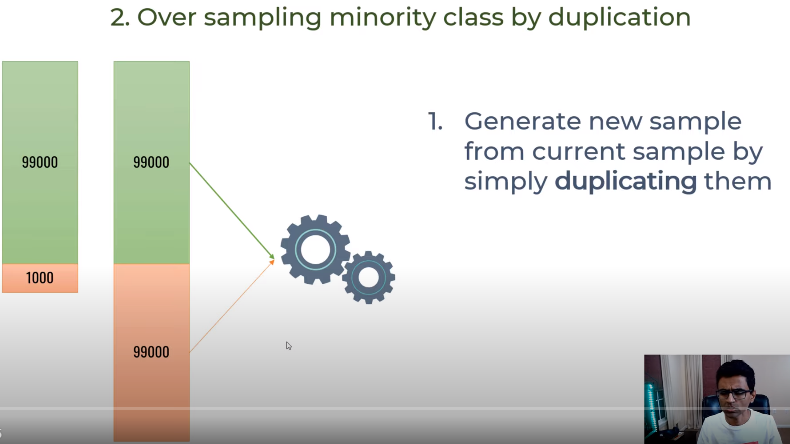

So, while this method works, but u would think maybe there's a better way, well yes, thats why we will go to the Third option...

## 3. OVER SAMPLE MINORITY CLASS USING SMOTE 

Here, we do oversampling using a technique called **SMOTE** which stands for **Synthetic Minority Oversampling Technique**.

So here, we use **K Nearest Neighbours** Algorithm and try to Produce SYNTHETIC samples from your 1k samples, thats why its called **Synthetic Minority Oversampling Technique**.

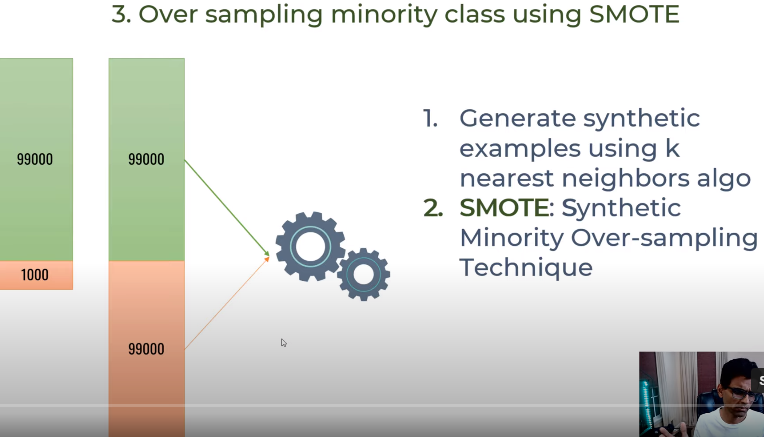

In machine learning, synthetic samples refer to artificially generated data points that are created to augment the original dataset. These samples are not collected from real-world observations but are instead produced through various techniques to enhance the dataset for better model training. The term "synthetic" in this context means that these samples are not naturally occurring but are created or simulated to resemble real data.

Synthetic samples can be useful for several purposes, including:
1) **Balancing Imbalanced Datasets:** When a dataset has a significant imbalance between classes, synthetic samples can be generated for the minority class to achieve a more balanced distribution. Techniques like Synthetic Minority Over-sampling Technique (SMOTE) are often used for this purpose.
2) **Data Augmentation:** For tasks such as image classification, new images can be generated by applying transformations (e.g., rotations, flips, scaling) to the existing images. This helps in increasing the diversity of the training data and improving the model's robustness.

In Python there is a module called **imblearn** which can be use for **SMOTE**

## 4. ENSEMBLE METHOD

The fourth technique is **Ensemble**, so lets say u have 3k transaction in one class and 1k  in another, so what u can do is, divide those 3k into 3 batches, then take the first batch, combine it with the 1k red transaction, build the model, call it model number 1, similarly, u take second and third batch and create model 2 and 3, so now u have three models, then u simply do a Majority vote, its kind of like Random forest algorithm where u divide ur datasets into subsets then train tree model on each of them and then simply Aggregate them

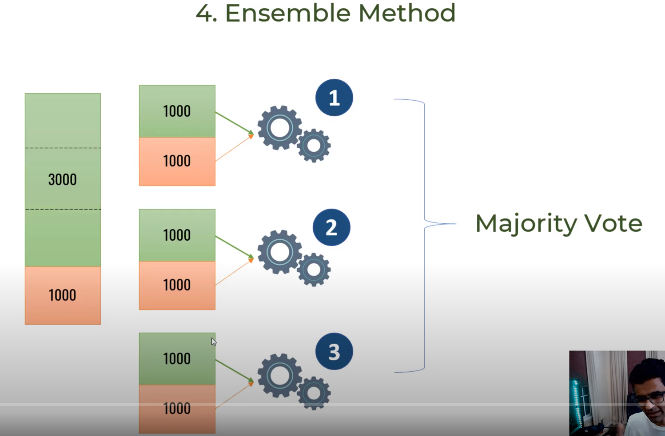

## 5. FOCAL LOSS

The other method is **Focal Loss**. Its a Special type of Loss function which will Penalie the Majority class and it will give more Weightage to the Minority class.

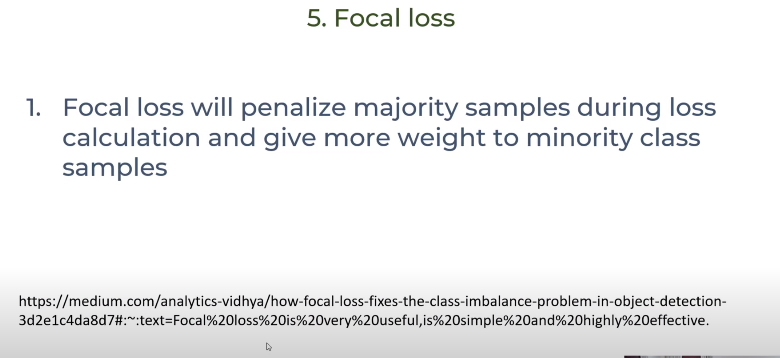

There is this article u can visit, it talks about the Maths behind Focal Loss and why it works.

Article = https://medium.com/analytics-vidhya/how-focal-loss-fixes-the-class-imbalance-problem-in-object-detection-3d2e1c4da8d7#:~:text=Focal%20loss%20is%20very%20useful,is%20simple%20and%20highly%20effective

## Imbalance dataset Exampls

These are some of the Examples of Imbalance Classes.

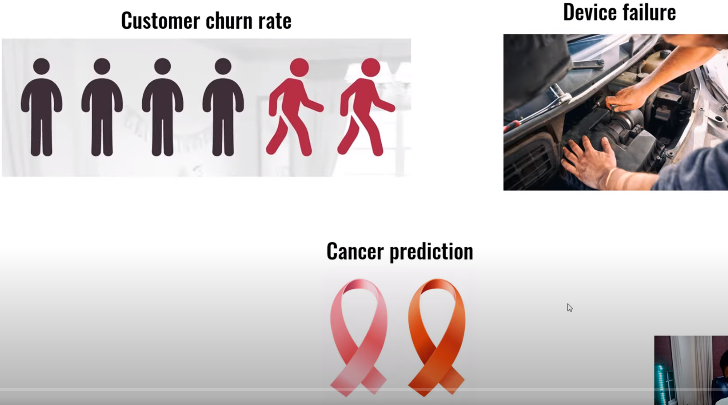

1) Customer Churn Prediction, when a company is doing very good service then the Churn rate would be very less leading to imbalance
2) Similarly Device Failure where theres less failed devices
3) Or Cancer prediction, because if u take 10k patience, then maybe only 5 of them have Cancer, so this is also another exmple of Imbalance datase

## ------------------------------ Python Code ------------------------------

You need to watch Tutorial video number 18 called Customer Churn Prediction cuz we will be using that same notebook or code here for Predicting Customer churn, so i will just quickly copy paste the codes from there to here

In [1]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv("C:\\Users\\User\\OneDrive\\Documents\\Faiz Khan Program\\DEEP LEARNING\\CODEBASICS\\datas\\Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [10]:
df.drop(["customerID"], axis=1, inplace=True)
df.drop(df[pd.to_numeric(df['TotalCharges'], errors="coerce").isnull()].index, inplace=True)
df.shape

(7032, 20)

In [11]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [12]:
df.replace("No internet service", "No", inplace=True)
df.replace("No phone service", "No", inplace=True)

In [13]:
for column in df.columns:
    if df[column].dtypes == "object":
        print(f"{column} : {df[column].unique()}")

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [15]:
df.replace({
    "Yes" : 1,
    "No" : 0
}, inplace=True)
df['InternetService'].replace(0, "No", inplace=True)

In [16]:
for column in df.columns:
    print(f"{column} : {df[column].unique()}")

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [17]:
df['gender'].replace({"Female":0, "Male":1}, inplace=True)
df = pd.get_dummies(data=df, columns=['InternetService', 'Contract', 'PaymentMethod'],
              drop_first=True).astype(int)
df.shape

(7032, 24)

In [18]:
df.dtypes

gender                                   int32
SeniorCitizen                            int32
Partner                                  int32
Dependents                               int32
tenure                                   int32
PhoneService                             int32
MultipleLines                            int32
OnlineSecurity                           int32
OnlineBackup                             int32
DeviceProtection                         int32
TechSupport                              int32
StreamingTV                              int32
StreamingMovies                          int32
PaperlessBilling                         int32
MonthlyCharges                           int32
TotalCharges                             int32
Churn                                    int32
InternetService_Fiber optic              int32
InternetService_No                       int32
Contract_One year                        int32
Contract_Two year                        int32
PaymentMethod

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.000000,0,0,0,1,0,...,0.11,0.001269,0,0,0,0,0,0,1,0
1,1,0,0,0,0.464789,1,0,1,0,1,...,0.38,0.215901,0,0,0,1,0,0,0,1
2,1,0,0,0,0.014085,1,0,1,1,0,...,0.35,0.010385,1,0,0,0,0,0,0,1
3,1,0,0,0,0.619718,0,0,1,0,1,...,0.24,0.210247,0,0,0,1,0,0,0,0
4,0,0,0,0,0.014085,1,0,0,0,0,...,0.52,0.015347,1,1,0,0,0,0,1,0


In [20]:
X = df.drop(['Churn'], axis=1)
y = df['Churn']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [22]:
import tensorflow as tf
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Dense(23, input_shape=(23,)),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="adam", 
             loss="binary_crossentropy",
             metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100)
y_pred = model.predict(X_test)
y_pred = [1 if i > 0.5 else 0 for i in y_pred]
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))




Epoch 1/100


176/176 [==============================] - 3s 4ms/step - loss: 0.4843 - accuracy: 0.7623
Epoch 2/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4197 - accuracy: 0.8023
Epoch 3/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4170 - accuracy: 0.8071
Epoch 4/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4158 - accuracy: 0.8012
Epoch 5/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4138 - accuracy: 0.8064
Epoch 6/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4129 - accuracy: 0.8050
Epoch 7/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4128 - accuracy: 0.8060
Epoch 8/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4125 - accuracy: 0.8062
Epoch 9/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4112 - accuracy: 0.8053
Epoch 10/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4109 - a

176/176 [==============================] - 1s 3ms/step - loss: 0.3736 - accuracy: 0.8277
Epoch 70/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3760 - accuracy: 0.8284
Epoch 71/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3744 - accuracy: 0.8281
Epoch 72/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3747 - accuracy: 0.8306
Epoch 73/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3734 - accuracy: 0.8293
Epoch 74/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3736 - accuracy: 0.8322
Epoch 75/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3726 - accuracy: 0.8274
Epoch 76/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3725 - accuracy: 0.8302
Epoch 77/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3702 - accuracy: 0.8300
Epoch 78/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3727 - accuracy: 

Okay, so till here we can see the **FI-Score** for 1 class is very low as compared to the 0 class, the accuracy shows to be **0.77** but its kind of useless when ur dataset is Imbalance, what matter is the f1 score for individual classes, in this case 1 have very low f1 score, u want both class to have high score, and thats exactly we are going to do in this video.

So our goal is to improve this f1 score for class 1

So, here i create a function below which does nothing but just build a model, compile then train, predict and display the Classification report, so i wont need to do it again and again

In [56]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(23, input_dim=23, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

## Method 1: Under sampling majority class
So now, the first Technique we are going to try is **Under sampling**

So if u look at the value counts u will see theres an imbalance

In [57]:
df['Churn'].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

 We can see 0 class have 5163 samples and 1 class only 1869 samples.
 
 Now, we will create 2 Dataframe, one for 1 class and another for 0 class, we will also store the value count for both class in a variable

In [58]:
class0_count, class1_count = df['Churn'].value_counts()
# Divide DataFrame by class
df_class0 = df[df['Churn'] == 0]
df_class1 = df[df['Churn'] == 1]

Now, we will Undersample the Majority class which in this case is class 0.

So how do we Undersample it? Well its easy, we can use the pandas **sample()** method and pass in number of how many samples u want, for example if u say 15, then it will randomly get 15 samples from ur dataset

So using sample() we will get 1869 random samples, or the num of samples of the Minority class, so instead of saying 1869 we will just pass `class1_count` variable, since it has 1869 in it, then will simply store it in a variable

In [59]:
df_class0_undersampled = df_class0.sample(class1_count)
df_class0_undersampled.shape

(1869, 24)

We can see we got 1869 samples, now we will Combine or Concat this with the Class 1 Dataframe on `axis=0` and store it in again a New Dataframe 

In [60]:
df_undersampled = pd.concat([df_class1, df_class0_undersampled], axis=0)
df_undersampled.shape

(3738, 24)

See now we got total 3738 samples because `3738 / 2 is 1869`

In [61]:
df_undersampled['Churn'].value_counts()

Churn
1    1869
0    1869
Name: count, dtype: int64

We can see now we got 1869 samples in both the Classes, now we are done Undersampling, lets split them into X and y then Train Test split them

In [62]:
X = df_undersampled.drop('Churn',axis='columns')
y = df_undersampled['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

Using `stratify=y` will ensure that u got equal samples of both classes in Train and Test set

In [63]:
print(y_train.value_counts())
print(y_test.value_counts())

Churn
0    1495
1    1495
Name: count, dtype: int64
Churn
1    374
0    374
Name: count, dtype: int64


We can see both Train and Test set have equal samples from both the Classes.

Now will simply Train our model and see the Classification report, we will use the Predefined model we created above

In [64]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 2s 4ms/step - loss: 0.6668 - accuracy: 0.6418
Epoch 2/100
94/94 [==============================] - 0s 4ms/step - loss: 0.5528 - accuracy: 0.7475
Epoch 3/100
94/94 [==============================] - 0s 4ms/step - loss: 0.5023 - accuracy: 0.7572
Epoch 4/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4891 - accuracy: 0.7645
Epoch 5/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4841 - accuracy: 0.7672
Epoch 6/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4790 - accuracy: 0.7686
Epoch 7/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4777 - accuracy: 0.7699
Epoch 8/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4741 - accuracy: 0.7682
Epoch 9/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4724 - accuracy: 0.7753
Epoch 10/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4702 - accuracy: 0.7766
Epoch 11/

94/94 [==============================] - 0s 4ms/step - loss: 0.4143 - accuracy: 0.8130
Epoch 84/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4153 - accuracy: 0.8067
Epoch 85/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4142 - accuracy: 0.8110
Epoch 86/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4129 - accuracy: 0.8107
Epoch 87/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4130 - accuracy: 0.8084
Epoch 88/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4122 - accuracy: 0.8080
Epoch 89/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4100 - accuracy: 0.8094
Epoch 90/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4127 - accuracy: 0.8064
Epoch 91/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4101 - accuracy: 0.8117
Epoch 92/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4090 - accuracy: 0.8107
Epoch 93/100


We can see from the Classification report above that, the Precision, Recall and F1-Score for our class 1 has improved as compared to earlier!

Yh sure for the class 0 the score dropped a lil but its okay because now we are doing a fair treatment for both the classes and thats more important than building a model thats bias to one class only.

## Method 2: Over sampling minority class

Now we will go back to our original data and do Over sampling to the Minority class by Duplication.

Lets again check the samples for both class which we have stored in these 2 variables

In [65]:
class0_count, class1_count

(5163, 1869)

So both class 0 has 5163 samples and 1 class have 1869, now lets divide both into 2 different DF again

In [66]:
df_class0 = df[df['Churn'] == 0]
df_class1 = df[df['Churn'] == 1]

Okay, now, we can use the same **sample()** method to Oversample our Minority class.

When you pass in a number that is more than the num of samples in ur dataset, it will simply randomy duplicate rest of samples to make up to the specified num, for example if u have 10 samples total but u pass in 50 in **sample()** then it will simply duplicate random sample again and again from the orignal 10 to make it upto 50.

In order to do this we use an argument `replace=True` so it will know to duplicate, if u dont specify this it wont work!

So we will store it in a new DF

In [67]:
df_class1_oversampled = df_class1.sample(class0_count, replace=True)
df_class1_oversampled.shape

(5163, 24)

You can see now we got 5163 samples as well for the class 1 dataset, now will simply Concat it to the class 0 dataset

In [69]:
df_oversampled = pd.concat([df_class0, df_class1_oversampled], axis=0)
df_oversampled['Churn'].value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64

Now we can see that both class has 5163 samples!

Now lets split the datas and again check the Classification report by calling that same Function

In [85]:
X = df_oversampled.drop('Churn',axis='columns')
y = df_oversampled['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 2s 3ms/step - loss: 0.5760 - accuracy: 0.7047
Epoch 2/100
259/259 [==============================] - 1s 4ms/step - loss: 0.5076 - accuracy: 0.7554
Epoch 3/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4960 - accuracy: 0.7642
Epoch 4/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4899 - accuracy: 0.7632
Epoch 5/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4859 - accuracy: 0.7638
Epoch 6/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4825 - accuracy: 0.7691
Epoch 7/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4784 - accuracy: 0.7702
Epoch 8/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4771 - accuracy: 0.7703
Epoch 9/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4749 - accuracy: 0.7735
Epoch 10/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4711 - accura

259/259 [==============================] - 1s 4ms/step - loss: 0.3960 - accuracy: 0.8215
Epoch 82/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3950 - accuracy: 0.8213
Epoch 83/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3948 - accuracy: 0.8197
Epoch 84/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3935 - accuracy: 0.8207
Epoch 85/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3924 - accuracy: 0.8218
Epoch 86/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3924 - accuracy: 0.8218
Epoch 87/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3917 - accuracy: 0.8218
Epoch 88/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3928 - accuracy: 0.8215
Epoch 89/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3909 - accuracy: 0.8249
Epoch 90/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3881 - accuracy: 

So we can see even using this method our class 1 scores have improved

## Method 3: Over sampling using SMOTE

In Method 2 we Over sampled by Duplication, now we will Oversample the Minority class using **SMOTE** technique which will produce Synthetic samples, and it uses the **KNN** Algorithm for this.

First we will split the dataset

In [92]:
X = df.drop('Churn',axis='columns')
y = df['Churn']

In [94]:
y.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

Now we can create SMOTE from the module called **imblearn**.

So u need to first **pip install imbalanced-learn** then use it as follows

In [95]:
# pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy="minority")
X_smote, y_smote = smote.fit_resample(X, y)
y_smote.value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64

Now we can see both class have same values.

1) SMOTE first identifies the class with fewer samples, known as the minority class.
2) It also identifies the class with more samples, known as the majority class.
3) For each sample in the minority class, SMOTE selects one or more of its nearest neighbors from the same class.
4) It then creates synthetic samples by interpolating between the sample and its selected nearest neighbors.
5) This interpolation is done in the feature space by taking a point along the line segment joining a minority class sample and one of its nearest neighbors.

Now lets Train Test split the new `X_smote` and `y_smote` then call the same function to find the Classification report

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote,
                                                    test_size=0.2, random_state=15, stratify=y_smote)
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 3s 4ms/step - loss: 0.5385 - accuracy: 0.7234
Epoch 2/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4622 - accuracy: 0.7814
Epoch 3/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4530 - accuracy: 0.7843
Epoch 4/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4492 - accuracy: 0.7885
Epoch 5/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4458 - accuracy: 0.7896
Epoch 6/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4433 - accuracy: 0.7923
Epoch 7/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4406 - accuracy: 0.7916
Epoch 8/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4382 - accuracy: 0.7943
Epoch 9/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4361 - accuracy: 0.7955
Epoch 10/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4339 - accura

259/259 [==============================] - 1s 4ms/step - loss: 0.3617 - accuracy: 0.8390
Epoch 82/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3608 - accuracy: 0.8390
Epoch 83/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3602 - accuracy: 0.8355
Epoch 84/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3603 - accuracy: 0.8377
Epoch 85/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3592 - accuracy: 0.8375
Epoch 86/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3594 - accuracy: 0.8377
Epoch 87/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3590 - accuracy: 0.8384
Epoch 88/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3588 - accuracy: 0.8415
Epoch 89/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3581 - accuracy: 0.8413
Epoch 90/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3587 - accuracy: 

Now u can see the scores for both class is not pretty good, even the overall accuracy increase more than when our data was imbalanced

## Method 4: Using Ensemble with Undersampling

In [98]:
df['Churn'].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [99]:
X = df.drop('Churn',axis='columns')
y = df['Churn']

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=15, stratify=y)

In [102]:
y_train.value_counts()

Churn
0    4130
1    1495
Name: count, dtype: int64

Okay, so in our Train sample, we have an imbalance cuz 0 class has 4130 samples and 1 class has only 1495 samples.

What we will do is, divide the 0 class into 3 subsets/batches, so if we do `4130 / 3 = 1376` so we will get 1376 samples for each subset, but u know what, lets just have 1495 samples in first and second subset and the rest leave for third subset, or u can simply do 1376 for each subset, ur choice

In [103]:
df_train = X_train.copy()
df_train['Churn'] = y_train
df_class0 = df_train[df_train['Churn'] == 0]
df_class1 = df_train[df_train['Churn'] == 1]

So now what we will do is, in `df_class0`, we will store first 1495 samples into a subset DF, then Concat it with the Minority DF

In [104]:
df_train1 = pd.concat([df_class0[:1495], df_class1], axis=0)
df_train1.shape

(2990, 24)

Now we will do the same and create 2 more subset, on 2nd subset we will store 1495 to 2990 and concat it again with the Minority class, then leave the rest for third subset and concat that also with the minority class, this way we will have 3 DF .

You know what, its a pain to do these 3 times, why not create a generic function that will take majority and minority class and start and end of index, also we will make it 

In [105]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    return X_train, y_train  

Now we will use this func to create the 3 subset again and Train the model on each one of the subset then get the Average

In [107]:
# First subset 
X_train, y_train = get_train_batch(df_class0, df_class1, 0, 1495)
y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 2s 5ms/step - loss: 0.6588 - accuracy: 0.6361
Epoch 2/100
94/94 [==============================] - 0s 4ms/step - loss: 0.5414 - accuracy: 0.7408
Epoch 3/100
94/94 [==============================] - 0s 4ms/step - loss: 0.5086 - accuracy: 0.7585
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4977 - accuracy: 0.7619
Epoch 5/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4910 - accuracy: 0.7666
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4854 - accuracy: 0.7645
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4827 - accuracy: 0.7652
Epoch 8/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4805 - accuracy: 0.7709
Epoch 9/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4800 - accuracy: 0.7692
Epoch 10/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4765 - accuracy: 0.7689
Epoch 11/

94/94 [==============================] - 0s 4ms/step - loss: 0.4198 - accuracy: 0.8040
Epoch 84/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4186 - accuracy: 0.7990
Epoch 85/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4177 - accuracy: 0.8080
Epoch 86/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4162 - accuracy: 0.8037
Epoch 87/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4172 - accuracy: 0.8047
Epoch 88/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4159 - accuracy: 0.8070
Epoch 89/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4151 - accuracy: 0.8040
Epoch 90/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4151 - accuracy: 0.8040
Epoch 91/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4146 - accuracy: 0.8050
Epoch 92/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4153 - accuracy: 0.8050
Epoch 93/100


The f1 score is low but its fine, cuz we will do it 3 times and aggregate it

In [108]:
# Second subset 
X_train, y_train = get_train_batch(df_class0, df_class1, 1495, 2990)
y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 2s 5ms/step - loss: 0.6603 - accuracy: 0.6348
Epoch 2/100
94/94 [==============================] - 0s 5ms/step - loss: 0.5517 - accuracy: 0.7381
Epoch 3/100
94/94 [==============================] - 0s 4ms/step - loss: 0.5073 - accuracy: 0.7538
Epoch 4/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4965 - accuracy: 0.7569
Epoch 5/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4909 - accuracy: 0.7639
Epoch 6/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4875 - accuracy: 0.7662
Epoch 7/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4849 - accuracy: 0.7662
Epoch 8/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4832 - accuracy: 0.7679
Epoch 9/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4823 - accuracy: 0.7635
Epoch 10/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4806 - accuracy: 0.7672
Epoch 11/

94/94 [==============================] - 0s 3ms/step - loss: 0.4031 - accuracy: 0.8147
Epoch 84/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4019 - accuracy: 0.8157
Epoch 85/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4007 - accuracy: 0.8167
Epoch 86/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4009 - accuracy: 0.8130
Epoch 87/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3997 - accuracy: 0.8174
Epoch 88/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3990 - accuracy: 0.8154
Epoch 89/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3989 - accuracy: 0.8137
Epoch 90/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3977 - accuracy: 0.8191
Epoch 91/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3959 - accuracy: 0.8184
Epoch 92/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3973 - accuracy: 0.8224
Epoch 93/100


In [110]:
# Third subset 
X_train, y_train = get_train_batch(df_class0, df_class1, 2990, 4130)
y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
83/83 [==============================] - 2s 4ms/step - loss: 0.6074 - accuracy: 0.6922
Epoch 2/100
83/83 [==============================] - 1s 9ms/step - loss: 0.5271 - accuracy: 0.7571
Epoch 3/100
83/83 [==============================] - 1s 7ms/step - loss: 0.5029 - accuracy: 0.7624
Epoch 4/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4917 - accuracy: 0.7700
Epoch 5/100
83/83 [==============================] - 0s 4ms/step - loss: 0.4852 - accuracy: 0.7750
Epoch 6/100
83/83 [==============================] - 0s 4ms/step - loss: 0.4795 - accuracy: 0.7750
Epoch 7/100
83/83 [==============================] - 0s 4ms/step - loss: 0.4767 - accuracy: 0.7769
Epoch 8/100
83/83 [==============================] - 0s 4ms/step - loss: 0.4722 - accuracy: 0.7822
Epoch 9/100
83/83 [==============================] - 0s 4ms/step - loss: 0.4699 - accuracy: 0.7844
Epoch 10/100
83/83 [==============================] - 0s 4ms/step - loss: 0.4671 - accuracy: 0.7848
Epoch 11/

83/83 [==============================] - 0s 4ms/step - loss: 0.3978 - accuracy: 0.8167
Epoch 84/100
83/83 [==============================] - 0s 4ms/step - loss: 0.3981 - accuracy: 0.8167
Epoch 85/100
83/83 [==============================] - 0s 4ms/step - loss: 0.3976 - accuracy: 0.8197
Epoch 86/100
83/83 [==============================] - 0s 4ms/step - loss: 0.3962 - accuracy: 0.8224
Epoch 87/100
83/83 [==============================] - 0s 4ms/step - loss: 0.3958 - accuracy: 0.8190
Epoch 88/100
83/83 [==============================] - 0s 4ms/step - loss: 0.3967 - accuracy: 0.8194
Epoch 89/100
83/83 [==============================] - 0s 4ms/step - loss: 0.3957 - accuracy: 0.8167
Epoch 90/100
83/83 [==============================] - 0s 4ms/step - loss: 0.3951 - accuracy: 0.8220
Epoch 91/100
83/83 [==============================] - 0s 4ms/step - loss: 0.3934 - accuracy: 0.8224
Epoch 92/100
83/83 [==============================] - 0s 4ms/step - loss: 0.3927 - accuracy: 0.8231
Epoch 93/100


Now we wanna get the majority vote, so how do we get the majority vote from 3 of these y_pred?

Well we can do something like, add all the prediction up, if u get 1, it means ur majority vote is 0, if u get more than 1 then means majority vote is 1, below is an example

In [113]:
vote1 = 0
vote2 = 1
vote3 = 0
vote1+vote2+vote3

1

So we will copy the y_pred1 into a final y_predicted, then run a for loop and add each of the value up from all 3 y_preds, if the total is more than 1, then add 1, else 0, meaning if the sum is above 1 than majority vote is class 1, else its class 0

In [111]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

Now will simply print the Classficiation report of the final y_pred

In [114]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.91      0.67      0.77      1033
           1       0.47      0.81      0.60       374

    accuracy                           0.71      1407
   macro avg       0.69      0.74      0.68      1407
weighted avg       0.79      0.71      0.72      1407



We can see, even using this Method, it kind of worked, although not as good as the previous method, i think the **SMOTE** worked the best!

So basically, this is just Trial and Error, see which Method or Technique worked the best.